#**Transfer Learning using ResNet101V2**
###Gayanthika Shankar
###School of Computing and Data Science
###gayanthika.s-26@scds.saiuniversity.edu.in

In [1]:
#import file

import zipfile
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:

#Importing necessary libraries and setting random seed
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image

2.17.1


In [3]:
from tqdm import tqdm
zip_ref = zipfile.ZipFile("/content/gdrive/MyDrive/DL_Data/Airplanes_Motorbikes_Schooners.zip", 'r')
for file in tqdm(zip_ref.namelist()):
 zip_ref.extract(file, "/content/gdrive/MyDrive/DL_Data/")
zip_ref.close()

100%|██████████| 3332/3332 [32:18<00:00,  1.72it/s]


In [4]:
#Importing the images
imgFiles = glob.glob("/content/gdrive/MyDrive/DL_Data/Airplanes_Motorbikes_Schooners/*/*.jpg")
for items in imgFiles[:8]:
  print(items)

/content/gdrive/MyDrive/DL_Data/Airplanes_Motorbikes_Schooners/airplanes/image_0595.jpg
/content/gdrive/MyDrive/DL_Data/Airplanes_Motorbikes_Schooners/airplanes/image_0581.jpg
/content/gdrive/MyDrive/DL_Data/Airplanes_Motorbikes_Schooners/airplanes/image_0768.jpg
/content/gdrive/MyDrive/DL_Data/Airplanes_Motorbikes_Schooners/airplanes/image_0754.jpg
/content/gdrive/MyDrive/DL_Data/Airplanes_Motorbikes_Schooners/airplanes/image_0032.jpg
/content/gdrive/MyDrive/DL_Data/Airplanes_Motorbikes_Schooners/airplanes/image_0026.jpg
/content/gdrive/MyDrive/DL_Data/Airplanes_Motorbikes_Schooners/airplanes/image_0740.jpg
/content/gdrive/MyDrive/DL_Data/Airplanes_Motorbikes_Schooners/airplanes/image_0797.jpg


##Data Preprocessing and Labelling

### Requirements
- Input shape: (224, 224, 3)
- 3 channels
- Width and height should be no smaller than 32
- Scale input pixels between -1 and 1


In [5]:

from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
X = []
y = []
for fName in imgFiles:
 img = load_img(fName, target_size=(224, 224))
 img_array = img_to_array(img)
 img_preprocessed = preprocess_input(img_array)
 X.append(img_preprocessed)
 label = fName.split("/")[-2]
 y.append(label)
#Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

In [6]:
#Check the first few entries and their type
print(f"Type of imgFiles: {type(imgFiles)}")
print(f"Length of imgFiles: {len(imgFiles)}")
print("First few entries:")
for f in list(imgFiles)[:3]:
    print(f"- {f}, type: {type(f)}")

Type of imgFiles: <class 'list'>
Length of imgFiles: 1661
First few entries:
- /content/gdrive/MyDrive/DL_Data/Airplanes_Motorbikes_Schooners/airplanes/image_0595.jpg, type: <class 'str'>
- /content/gdrive/MyDrive/DL_Data/Airplanes_Motorbikes_Schooners/airplanes/image_0581.jpg, type: <class 'str'>
- /content/gdrive/MyDrive/DL_Data/Airplanes_Motorbikes_Schooners/airplanes/image_0768.jpg, type: <class 'str'>


In [7]:
print(y)

['airplanes' 'airplanes' 'airplanes' ... 'Motorbikes' 'Motorbikes'
 'Motorbikes']


In [8]:
class_counts = dict()

#Count images for each class
for file_path in imgFiles:
    class_name = file_path.split("/")[-2]
    if class_name not in class_counts:
        class_counts[class_name] = 1
    else:
        class_counts[class_name] += 1

for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Count: {count}")

Class: airplanes, Count: 800
Class: schooner, Count: 63
Class: Motorbikes, Count: 798


In [9]:
from sklearn.preprocessing import LabelEncoder
lEncoder = LabelEncoder()
y = lEncoder.fit_transform(y)

print(set(y))
print(lEncoder.classes_)


{0, 1, 2}
['Motorbikes' 'airplanes' 'schooner']


In [10]:
X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)


(1661, 224, 224, 3)
(1661,)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    stratify=y, random_state=42)


print("X_train_shape: {}".format(X_train.shape))
print("X_test_shape: {}".format(X_test.shape))

X_train_shape: (1245, 224, 224, 3)
X_test_shape: (416, 224, 224, 3)


In [12]:
mu = X_train.mean()
std = X_train.std()

X_train_std = (X_train-mu)/std
X_test_std = (X_test-mu)/std

In [13]:
X_train_std.shape

(1245, 224, 224, 3)

In [14]:
y_train.shape

(1245,)

In [15]:
X_train

array([[[[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ...,
         [-0.36470586, -0.30196077, -0.21568626],
         [-0.3960784 , -0.34117645, -0.29411763],
         [ 0.9607843 ,  1.        ,  1.        ]],

        [[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ...,
         [-0.36470586, -0.30196077, -0.21568626],
         [-0.3960784 , -0.34117645, -0.29411763],
         [ 0.9607843 ,  1.        ,  1.        ]],

        [[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ...,
         [-0.36470586, -0.30196077, -0.21568626],
         [-0.3960784 , -0.34117645, -0.29411763],
         [ 0.9607843 ,  1.        ,  1.        ]],

        ...,

        [[ 1.        ,  1.        ,  1

In [16]:
#Load a single image and check its values before preprocessing
img = load_img(imgFiles[0], target_size=(224, 224))
img_array = img_to_array(img)
print("Original image values range:", img_array.min(), "to", img_array.max())
print("Sample of original image values:\n", img_array[0:2, 0:2])

#Check after preprocessing
img_preprocessed = preprocess_input(img_array)
print("\nPreprocessed image values range:", img_preprocessed.min(), "to", img_preprocessed.max())
print("Sample of preprocessed values:\n", img_preprocessed[0:2, 0:2])

Original image values range: 0.0 to 255.0
Sample of original image values:
 [[[255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]]]

Preprocessed image values range: -1.0 to 1.0
Sample of preprocessed values:
 [[[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]]


In [17]:
print("X_train shape:", X_train.shape)
print("Value range:", X_train.min(), "to", X_train.max())

X_train shape: (1245, 224, 224, 3)
Value range: -1.0 to 1.0


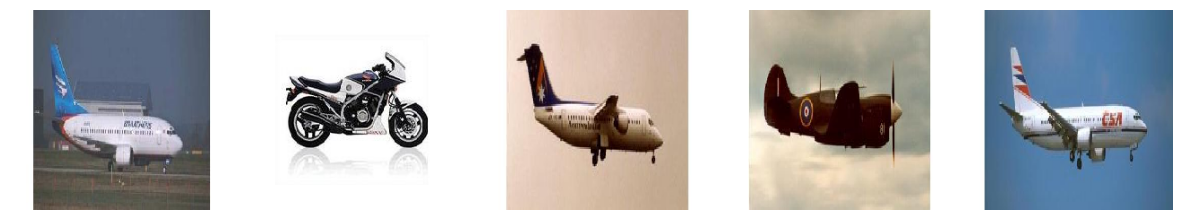

In [18]:
import matplotlib.pyplot as plt

def show_images(X, n=5):
    plt.figure(figsize=(15, 3))
    for i in range(n):
        plt.subplot(1, n, i+1)
        #Convert back from preprocessed form for visualization
        img = (X[i] + 1) / 2  #Scale  range
        plt.imshow(img)
        plt.axis('off')
    plt.show()

show_images(X_train)

##Building the model

In [19]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

base_model2 = keras.applications.ResNet101V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="resnet101v2",
)

2.17.1
179518384/179518384 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [20]:
base_model2 = keras.applications.ResNet101V2(include_top=False,input_shape = (224,224,3), weights='imagenet')

171317808/171317808 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [21]:
base_model2.trainable = False

for layer in base_model2.layers:
  layer.trainabe = False


In [22]:
from tensorflow.keras import layers

#classifier

x = keras.layers.GlobalAveragePooling2D()(base_model2.output)
x = layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.35)(x)
output_ = layers.Dense(3, activation='softmax')(x)

model2 = keras.models.Model(inputs=[base_model2.input], outputs=[output_])

##Training the model

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

model2.compile(loss='sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

callbacks2 = [keras.callbacks.ModelCheckpoint("best_ResNet101V2_TL.weights.h5",
                                              monitor='val_accuracy',
                                              save_weights_only=True,
                                              save_best_only=True)]

datagen = ImageDataGenerator(
    rotation_range=20,  #randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  #randomly shift images horizontally by up to 20%
    height_shift_range=0.2,  #randomly shift images vertically by up to 20%
    horizontal_flip=True,  #randomly flip images horizontally
    fill_mode='nearest',  #strategy for filling in newly created pixels
    validation_split=0.1 #10% validation split defined here
)

#Create train generator
train_generator = datagen.flow(
    X_train_std,
    y_train,
    batch_size=32,
    subset='training'    #Specify this is for training
)

#Create validation generator
validation_generator = datagen.flow(
    X_train_std,
    y_train,
    batch_size=32,
    subset='validation'  #Specify this is for validation
)

#Train the model
history = model2.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=callbacks2
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 44s 777ms/step - accuracy: 0.9659 - loss: 0.0872 - val_accuracy: 0.9758 - val_loss: 0.0483
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 304ms/step - accuracy: 0.9803 - loss: 0.0551 - val_accuracy: 0.9839 - val_loss: 0.0292
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 283ms/step - accuracy: 0.9748 - loss: 0.0575 - val_accuracy: 0.9758 - val_loss: 0.0466
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 312ms/step - accuracy: 0.9799 - loss: 0.0522 - val_accuracy: 0.9919 - val_loss: 0.0132
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 279ms/step - accuracy: 0.9718 - loss: 0.0731 - val_accuracy: 0.9758 - val_loss: 0.0507
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 279ms/step - accuracy: 0.9751 - loss: 0.0577 - val_accuracy: 0.9839 - val_loss: 0.0560
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 282ms/step - accuracy: 0.9640 - loss: 0.0881 - val_accuracy: 0.9919 - val_loss: 0.0220
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 290ms/step - accuracy: 0.9765 - loss: 0.0649 - val_accuracy: 0.967

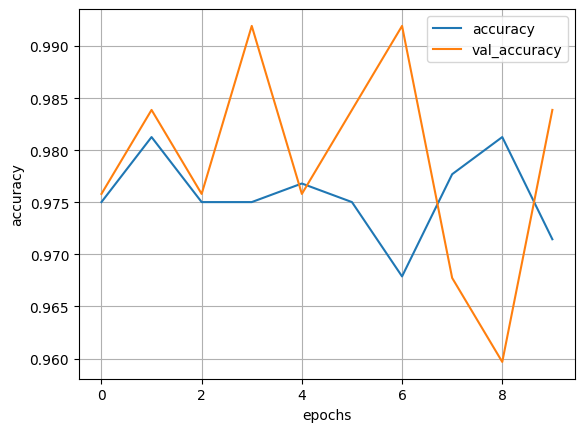

In [26]:
#visualize accuracy

keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

##Update model with best weight

In [27]:
model2.load_weights("best_ResNet101V2_TL.weights.h5")

testLoss2, testAccuracy2 = model2.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss2, testAccuracy2))

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.9782 - loss: 0.0757
Test-loss: 0.049212, Test-accuracy: 0.983173


##Performance

In [28]:
y_prob = model2.predict(X_test_std)
y_predict = np.argmax(y_prob, axis=-1)
print(y_predict)

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step
[1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 2 1 0 1 0 0 0 0 1 1 1 0 0 2 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 2 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1
 1 0 1 0 1 1 1 1 0 2 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 0 2 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 2 0 0 1 0 0 0 1
 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 2 2 1 1 1 1 0
 0 2 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 2 1 2 0 0 0 0 1 0 1 0 0 0 1 1 2
 1 0 1 1 1 1 0 0 1 0 1 2 0 2 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 2 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 0 1 0 2 0 0 1 0 0]


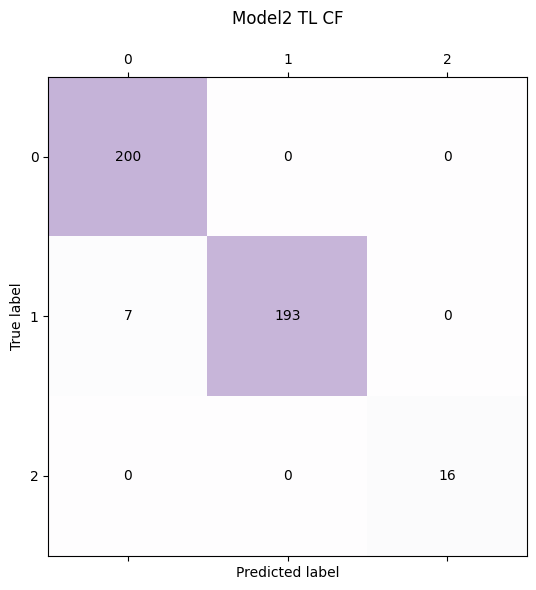

{0, 1, 2}
['Motorbikes' 'airplanes' 'schooner']


In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Purples, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('Model2 TL CF\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

print(set(y))
print(lEncoder.classes_)


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.9837421033073207
Recall:  0.9831730769230769
F1-score:  0.9831679220992199






##Save the model and the dataset

In [ ]:
model2.save('/content/gdrive/MyDrive/DL/ResNet101V2_Best_Model_TL.h5')


In [ ]:

from numpy import save

save('/content/gdrive/MyDrive/DL/X_train_std_model2.npy', X_train_std)
save('/content/gdrive/MyDrive/DL/X_test_std_model2.npy', X_test_std)

save('/content/gdrive/MyDrive/DL/y_train_model2.npy', y_train)
save('/content/gdrive/MyDrive/DL/y_test_model2.npy', y_test)